# MNIST Digit Classification Neural Network

This notebook is my attempt to build a basic neural networks model that can recognize hand-written digits.

The MNIST dataset is available through the scikit-learn datasets as well as other open-sourced platforms. Here you find black and white images of hand-written digits (numbers 0 through 9). This dataset consist of 60,000 examples in the training set and 10,000 examples in the test set - which are already nicely split. Plus, the digits have been size-normalized and centered in a fixed-size image.

# Libraries

In [1]:
# Import necessary libraries
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# NN model libraries
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras import utils
# CNN libraries
from keras.layers import Conv2D, MaxPooling2D

# Load the data

In [39]:
# Load the data from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [40]:
# Check their shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

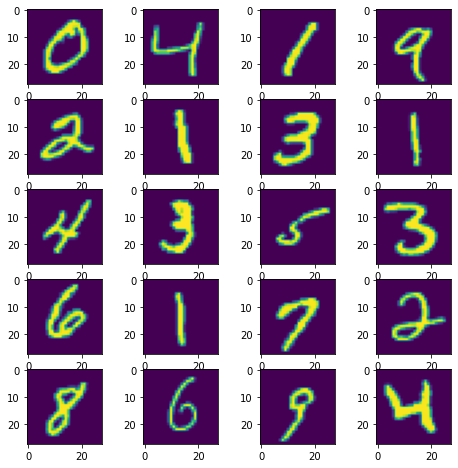

In [41]:
# View some of the handwritten digits
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

In [42]:
# Convert labels to 1's and 0's
y_binary_train = utils.to_categorical(y_train)
y_binary_test = utils.to_categorical(y_test)

In [43]:
# Each of the images has 1 of 10 possibilities
print(y_binary_test[0])
y_binary_test.shape

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


(10000, 10)

# Basic Neural Network

We will use the Sequential() model for a simple stack of layers where each layer has exactly one input tensor and one output tensor. Sequential groups a linear stack of layers into a tenserflow keras model.

Flatten takes the 28 x 28 array and turns it into a 784 x 1 array 

In [44]:
# Build the basic neural network model
model_1 = Sequential()
model_1.add(Flatten(input_shape=(28, 28)))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))

In [45]:
# Check out summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 300,938
Trainable params: 300,938
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compile 
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Fit the model
#%%time
training_results = model_1.fit(X_train, y_binary_train,
                               epochs=10, batch_size=128,
                               validation_data=(X_test, y_binary_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 1.5947 - accuracy: 0.8797 - val_loss: 0.3102 - val_accuracy: 0.9304
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2251 - accuracy: 0.9459 - val_loss: 0.2273 - val_accuracy: 0.9468
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1342 - accuracy: 0.9635 - val_loss: 0.2099 - val_accuracy: 0.9555
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1008 - accuracy: 0.9712 - val_loss: 0.2108 - val_accuracy: 0.9541
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0894 - accuracy: 0.9743 - val_loss: 0.1849 - val_accuracy: 0.9582
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0796 - accuracy: 0.9772 - val_loss: 0.1699 - val_accuracy: 0.9636
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0794 - accuracy: 0.9771 - val_loss: 0.1759 - val_accuracy: 0.9618
Epoch 

# Visualization Functions

In [49]:
# Functions for accuracy and loss
def visualize_loss(model_results):
    history = model_results.history
    training_loss_values = history['loss']
    val_loss_values = history['val_loss']

    epochs = range(1, len(training_loss_values) + 1)
    plt.plot(epochs, training_loss_values, 'g', label='Training Loss')
    plt.plot(epochs, val_loss_values, 'r', label='Val Loss')

    plt.title('Training vs Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def visualize_accuracy(model_results):
    history = model_results.history
    training_acc_values = history['accuracy']
    val_acc_values = history['val_accuracy']

    epochs = range(1, len(training_acc_values) + 1)
    plt.plot(epochs, training_acc_values, 'g', label='Training Accuracy')
    plt.plot(epochs, val_acc_values, 'r', label='Val Accuracy')

    plt.title('Training vs Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

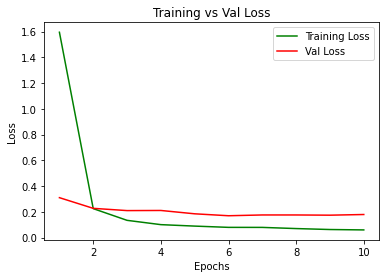

In [50]:
# Run loss function chart
visualize_loss(training_results)

Looks like after 2 Epochs the model has figured it out.

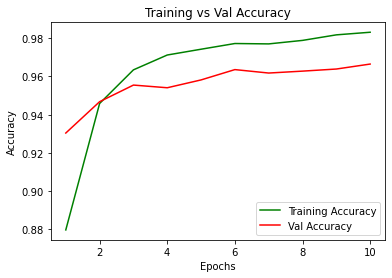

In [51]:
# Run accuracy function chart
visualize_accuracy(training_results)

We can see from the accuracy function that the validation set maxes out around 97%, although after 2 Epochs it is around 95%.

In [52]:
# Review first models accuracy after set Epochs
training_results.history['val_accuracy'][-1]

0.9664999842643738

# CNN Model

In [53]:
# Additional libraries
from keras.layers import Conv2D, MaxPooling2D

In [54]:
# Build a Convolutional Neural Network
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation = 'relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(64, activation = 'relu'))
model_cnn.add(Dense(10, activation = 'softmax'))

In [55]:
# Model summary
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [56]:
# Compile CNN
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
# Fit the CNN
#%%time
training_results_cnn = model_cnn.fit(X_train.reshape(60000, 28, 28, -1), y_binary_train,
                               epochs=5, batch_size=128,
                               validation_data=(X_test.reshape(10000, 28, 28, -1), y_binary_test))

Epoch 1/5
469/469 [==============================] - 40s 85ms/step - loss: 0.3336 - accuracy: 0.9241 - val_loss: 0.0670 - val_accuracy: 0.9791
Epoch 2/5
469/469 [==============================] - 45s 96ms/step - loss: 0.0623 - accuracy: 0.9805 - val_loss: 0.0537 - val_accuracy: 0.9824
Epoch 3/5
469/469 [==============================] - 41s 88ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0377 - val_accuracy: 0.9890
Epoch 4/5
469/469 [==============================] - 43s 91ms/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0409 - val_accuracy: 0.9892
Epoch 5/5
469/469 [==============================] - 42s 90ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0412 - val_accuracy: 0.9882


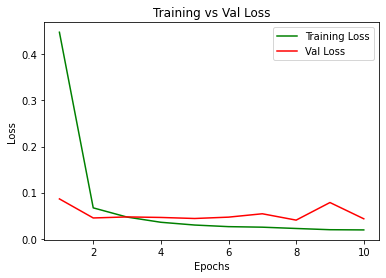

In [22]:
# Run loss function chart
visualize_loss(training_results_cnn)

This model also seems to figure out the pattern by about 2 Epochs.

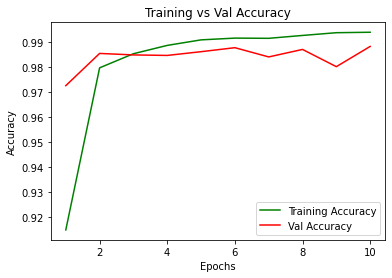

In [23]:
# Run accuracy function chart
visualize_accuracy(training_results_cnn)

This model approaches it's max accuracy around 99%, though it doesn't improve much after the 2 Epochs where it is close to 98%.

# Accuracy Comparison

In [24]:
# Review first models accuracy
training_results.history['val_accuracy'][-1]

0.968500018119812

In [25]:
# Review cnn model accuracy
training_results_cnn.history['val_accuracy'][-1]

0.9883000254631042

# Conclusion

So the Convolutional Nueral Network did slightly better than the basic Multi-layer Perceptron NN. Both had pretty high valadation accuracy results even after only a couple Epochs.

# Future Work

With some help from my former instructor, Jeff Herman, I was finally able to get these models to run. I'm sure there are more parameters I could adjust, or add more layers to the perceptron in either model. It didn't seem like running more Epochs would make a difference, though I could change the batch size.